<a href="https://colab.research.google.com/github/amytan830/ENGR-120/blob/main/Group10_Final_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project: Code**

Team Members: Mai Kaewrawang, Karlie Aleman, Amy Tan

Description: The purpose of our chatbot is to help job seekers in their career journey. It provides them with information such as salary, education, and skills needed for their choice of career/occupation. It also includes visualizations to show a few job trends.

## **Step 1:** Install and Import Data This is to make sure that the user has all neccessary libraries needed to run the chatbot and the relevant data.

In [ ]:
#Install Libraries
!pip install pyinputplus
!pip install colorama

# Import Libraries
import pandas as pd
import pyinputplus as pyip
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
from colorama import Fore

## **Step 2:** Import Data The following code imports all the necessary data and uses pandas to read and create dataframe for each dataset. Additionally, data manipulation is performed to clean the datasets, which includes tasks such as renaming columns, removing unnecessary columns and/or rows, handling missing values, and converting data types to ensure consistency and accuracy.

In [ ]:
# Read Data and Create dataframes(7 in total)

## 1. Jobs based on Education dataset ##
edu_path = 'https://raw.githubusercontent.com/mkaewrawang/ENGR120Project/refs/heads/main/jobedu.csv'
jobedu_df = pd.read_csv(edu_path)

#Rename column
jobedu_df.rename(columns = {'employment_matrix':'Job Title'}, inplace = True)

## 2. Skills dataset ##
skills_filepath = 'https://docs.google.com/spreadsheets/d/1pdxTk6HOC2PbnDARqrh3B6-lH7JGdqVVJffvDy3SdM0/export?format=csv'
skills_df = pd.read_csv(skills_filepath)

#Rename column
skills_df.rename(
    columns = {'2023 National Employment Matrix title': 'Job title'},
    inplace = True)


## 3. National Salaries dataset ##
nat_salary_filepath = 'https://github.com/amytan830/ENGR-120/raw/refs/heads/main/National_Salaries.csv'
nat_salary_df = pd.read_csv(nat_salary_filepath)

# Rename rows
nat_salary_df.rename(columns = {
    '2023 National Employment Matrix title': 'Occupation',
    'Median annual wage, dollars, 2023[1]': 'Median_annual_wage'},
                inplace = True)

# "Data is unavailable for values denoted with a (—)": Remove rows
nat_salary_df = nat_salary_df[nat_salary_df['Occupation'] != '—']

# Clean up occupation names that have '[2]' at the end
nat_salary_df['Occupation'] = (
    nat_salary_df['Occupation'].str.replace(r'\[\d+\]$', '',regex = True)
)

# Remove spaces from occupation names
nat_salary_df['Occupation'] = nat_salary_df['Occupation'].str.strip()

## 4. California salaries dataset ##
salary_filepath = 'https://github.com/amytan830/ENGR-120/raw/refs/heads/main/Salaries_CA.csv'
salary_df = pd.read_csv(salary_filepath)

# Rename columns
salary_df.rename(columns = {
    'OCC_TITLE': 'JOB_TITLE'},
    inplace = True)

# Drop rows with no value in relevant columns (indicated by *, **, #)
salary_df = salary_df[~salary_df['A_MEDIAN'].isin(['*', '**', '#'])]

# Convert numeric columns from object to float datatype
salary_df['A_MEDIAN'] = (
    salary_df['A_MEDIAN'].str.replace(',', '').astype(int)
)

## 5. Largest occupations in California dataset ##
ca_emp_filepath = 'https://github.com/amytan830/ENGR-120/raw/refs/heads/main/Emp_CA.csv'
ca_emp_df = pd.read_csv(ca_emp_filepath)

# Remove commas for 'Employment' column and change datatype to integer
ca_emp_df['Employment'] = (
    ca_emp_df['Employment'].str.replace(',', '').astype(int)
)
## 6. Fastest growing occupations dataset ##
growing_occ_filepath = 'https://github.com/amytan830/ENGR-120/raw/refs/heads/main/Fastest_growing_occupations.csv'
growing_occ_df = pd.read_csv(growing_occ_filepath)

# Drop irrelevant columns
growing_occ_df.drop (columns = ['2023 National Employment Matrix code',
                                'Employment change, numeric, 2023–33',
                                'Median annual wage, dollars, 2023'],
                    inplace = True)

# Drop row 0 containing all occupation total since it is not relevant
growing_occ_df = growing_occ_df.drop(index = 0)

# Rename column names
growing_occ_df.rename(columns = {
    '2023 National Employment Matrix title': 'Job_Title',
    'Employment, 2023': '2023_emp',
    'Employment, 2033': '2033_emp',
    'Employment change, percent, 2023–33': 'Emp_percent_change'},
                inplace = True)


## 7. Fastest declining occupations dataset ##
decline_occ_filepath = 'https://github.com/amytan830/ENGR-120/raw/refs/heads/main/Fastest_declining_occupations.csv'
decline_occ_df = pd.read_csv(decline_occ_filepath)

# Drop irrelevant columns
decline_occ_df.drop (columns = ['2023 National Employment Matrix code',
                                    'Employment change, numeric, 2023–33',
                                    'Median annual wage, dollars, 2023'],
                        inplace = True)

# Drop row 0 containing all occupation total since it is not relevant
decline_occ_df = decline_occ_df.drop(index = 0)

# Rename column names
decline_occ_df.rename(columns = {
        '2023 National Employment Matrix title': 'Job_Title',
        'Employment, 2023': '2023_emp',
        'Employment, 2033': '2033_emp',
        'Employment change, percent, 2023–33': 'Emp_percent_change'},
                    inplace = True)


## **Main Menu:**

In [ ]:
# Main Menu
def main_menu():
    """Displays the main menu guiding job seekers to explore career paths."""
    print(
        'Welcome to career chatbot.'
        'We specialize in guiding job seekers navigating through '
        'their career paths.Please choose the options displayed below.'
    )
    job = pyip.inputMenu(
        [
            'Jobs according to education level',
            'Job skills required for different occupations',
            'Salaries for different fields',
            'Visualizations for job market trends',
        ],
        numbered=True
    )
    job = job.lower()
    if job == 'jobs according to education level':
        edu_menu()
    elif job == 'job skills required for different occupations':
        job_skills_menu()
    elif job == 'salaries for different fields':
        menu_opt3()
    elif job == 'visualizations for job market trends':
        menu_opt4()

# Restart function
def menu_restart_quit():
    """Ask user whether they want to restart or quit."""
    print('How would you like to proceed?')
    restart_quit = pyip.inputMenu(
        ['Return to the main menu', 'Quit'], numbered = True)
    if restart_quit.lower() == 'return to the main menu':
        print('Taking you back to the beginning...')
        time.sleep(1)
        main_menu()  # Call main_menu fuction to restart
        return
    elif restart_quit.lower() == 'quit':
        print('I hope I was able to help you find what you were looking for!')
        print('Thank you for using our career chatbot.')
        return


## **Part 1:** Menu Option 1

In [ ]:
# Part 1
def edu_menu():
    """When user selects menu option 1. Gives user lists of
    possible occupations based on their education level.
    """
    edu_lvl = pyip.inputMenu(
        [
            'No formal educational credential',
            'High school diploma or equivalent',
            "Associate's degree",
            "Bachelor's degree",
            'Postsecondary nondegree award',
            "Master's degree",
            'Doctoral or professional degree',
        ],
        numbered = True
    )
    edu_lvl = edu_lvl.lower()

    jobedu_df['education_needed'] = jobedu_df['education_needed'].str.lower()

    # Filter jobedu_df based on the selected education level
    find_data = jobedu_df[jobedu_df['education_needed'] == edu_lvl]

    # Check if any data was found and print it
    if not find_data.empty:
        while True:  # Start a loop for random sampling
            sampled_data = find_data.sample(n = 10)
            print('Here are 10 random jobs: ')
            display(sampled_data)

            # Ask the user if they like the current list
            job_list = pyip.inputYesNo(
                'Do you like this list of possible jobs?'
                )
            job_list = job_list.lower()
            if job_list == 'yes':
                menu_restart_quit()
                break
            else:
                print('Generating a new list...')
                time.sleep(1)
    else:
        print(f'No data found for the education level: ' +
              f'{edu_lvl}. Please check the input.')



## **Part 2:** Menu Option 2

In [ ]:
# Part 2
def job_skills_menu():
    """When users select menu option 2.
    Display top skills required for a specific occupation.
    """

    # Collect data for the occupation desired
    job = input(
        'What occupation are you interested in learning skills for?'
         ).lower()

    # Check if occupation exists in the data set
    if skills_df[skills_df['Job title'].str.contains(job, case = False)].empty:
        print("""Sorry, we do not have information on that occupation
        Please enter a valid occupation to continue.""")
    else:
        df_job = skills_df[skills_df['Job title'].str.contains(
            job, case = False)]

    # Convert data to long format if occupation exists
        col_names = df_job.columns.tolist()
        df_long = pd.melt(df_job,
                          id_vars = ['Job title'],
                          value_vars = col_names)
        df_long.rename(columns = {'variable': 'Skill', 'value': 'Rating'},
                       inplace = True)

    # Output top 3 skills for occupation
        top_skills = df_long.nlargest(3, 'Rating')
        print(f'The top skills for a {job} are:')
        for idx, row in top_skills.iterrows():
            print(f"- {row['Skill']}: {row['Rating']}")

    # Follow up question
    follow_up = pyip.inputMenu(
        ['Enter a new occupation', 'Return to the main menu', 'Quit'],
        numbered = True
    )
    follow_up = follow_up.lower()
    if follow_up == 'enter a new occupation':
        job_skills_menu()
    elif follow_up == 'return to the main menu':
        main_menu()
    elif follow_up == 'quit':
        print('Goodbye! Wishing you all the best on your job search!')



## **Part 3:** Menu Option 3

In [ ]:
# Part 3

def another_occ():
    """ Gives choice for users to enter another occupation,
     return to main menu, or quit.
      """
    another = pyip.inputYesNo(
        'Would you like to look at the salary for another occupation? '
        ).lower()
    if another == 'yes':
        print('Yay! Rebooting the system!')
        time.sleep(1)
        menu_opt3()
        return
    elif another == 'no':
        print('Aww, okay.')
        menu_restart_quit()

def menu_opt3():
    """ When user selects menu option 3. Provides salary information
    for occupation that user enters.
    """
    job = input(
        'What occupation would you like to know the salary for? '
        'Please enter a specific occupation or keyword: '
        )
    job = job.lower().strip()

    # Loop to check if input contains matching occupation
    # if true, loop continues to ask user to enter occupation again
    # if false, loop exists and moves on to following code to get salary information from appropriate row
    while nat_salary_df[
        nat_salary_df['Occupation'].str.contains(job, case = False)].empty:
        print(
            'Sorry, there is no matching occupation in our database. '
            'Please try again.'
        )
        job = input(
            'What occupation would you like to know the salary for? '
        ).lower().strip()

    # Match user input to occupations in dataframe
    match = nat_salary_df[nat_salary_df['Occupation'].str.contains(
        job, case = False)]

    # Get unique occupation names
    matching_occupations = match['Occupation'].unique()

    # create list of matching occupations
    occupation_choices = []
    for occupation in matching_occupations:
        if occupation not in occupation_choices:
            occupation_choices.append(occupation)

    # Create condition where there is only one matching occupation
    if len(occupation_choices) == 1:
        selected_occupation = occupation_choices[0]
        print(f'Only one match found: {selected_occupation}')
    else:
    # If more than one matching occupation, output list for user to choose from
        selected_occupation = pyip.inputMenu(
            occupation_choices,
            prompt = (
                'Here are all the occupations in our database '
                'that match your input. Please select one of the following:\n'),
            numbered=True
        )
    selected_occupation = selected_occupation.lower()

    # Get salary for selected occupation
    selected_row = match[match['Occupation'].str.lower() == selected_occupation]
    salary = selected_row.iloc[0]['Median_annual_wage']
    print(
        f'The occupation {Fore.RED}{selected_occupation}{Fore.RESET} ' +
        f'receives a median annual salary of {Fore.GREEN}${salary}{Fore.RESET}.'
        )

    # Ask user how they want to proceed
    another_occ()

## **Part 4:** Menu Option 4

In [ ]:
# Part 4
# Menu option #4

# Define function to create barplots
def create_barplot(data, x, y, xlabel, ylabel = None, color = None):
    """Creates a barplot based on inputs for data, axis labels, and color.
    Parameters:
        data: The data to use for the barplot
        x: The column name for the x-axis variable
        y: The column name for the y-axis variable
        xlabel: Label for the x-axis
        ylabel: Label for the y-axis (default is no label)
        color: Color for the bars (default is blue)
        """
    barplot = sns.barplot(data=data, x=x, y=y, color=color)
    barplot.set(xlabel=xlabel, ylabel=ylabel)
    plt.show()
    time.sleep(2)

def next_steps():
    """ Presents user with options for what the user can do
    after seeing one visualization.
    """
    next = pyip.inputYesNo('I hope you found the visualization interesting! ' +\
          'Do you want to visualize another trend? ')
    next = next.lower()
    if next == 'yes':
        print('Alrighty!')
        time.sleep(1)
        menu_opt4()
        return
    if next == 'no':
        menu_restart_quit()

# Define function for menu option 4
def menu_opt4():
    """ When user selects menu option 4.
    Displays visualizations for job market trends.
    """
    print('Hi there! I have a couple of visualizations to show. ' +\
          'Which one would you like to see?')

    viz_choice = pyip.inputMenu(
        [
        'Occupations with highest median annual wage in California',
        'Most employed occupations in California as of May 2023',
        'Fastest growing occupations between 2023 and 2033',
        'Fastest declining occupations between 2023 and 2033'
         ],
        numbered = True
        )

    viz_choice = viz_choice.lower()
    if viz_choice == 'occupations with highest median annual wage in california':
        top_20 = salary_df.nlargest(20, 'A_MEDIAN')
        print(f'Here is a barplot displaying ' +
              f'{Fore.RED}{viz_choice.title()} as of May 2023{Fore.RESET}')
        create_barplot(top_20,
                       x = 'A_MEDIAN',
                       y = 'JOB_TITLE',
                       xlabel = 'Annual Median Wage',
                       color = 'green')

    elif viz_choice == 'most employed occupations in california as of may 2023':
        print(f'Here is a barplot displaying ' +
              f'{Fore.RED}{viz_choice.title()}{Fore.RESET}')
        create_barplot(data = ca_emp_df,
                       x = 'Employment',
                       y = 'Occupation',
                       xlabel = 'Number of People Employed',
                       color = 'deepskyblue')

    elif viz_choice == 'fastest growing occupations between 2023 and 2033':
        top_growing_jobs = growing_occ_df.nlargest(10, 'Emp_percent_change')
        print(f'Here is a barplot displaying ' +
              f'{Fore.RED}{viz_choice.title()}{Fore.RESET}')
        create_barplot(top_growing_jobs,
                      x = 'Emp_percent_change',
                      y = 'Job_Title',
                      xlabel = 'Percent Increase in Employment',
                      color = 'orange')

    elif viz_choice == 'fastest declining occupations between 2023 and 2033':
        decline_top_10 = decline_occ_df.nsmallest(10, 'Emp_percent_change')
        print(f'Here is a barplot displaying ' +
              f'{Fore.RED}{viz_choice.title()}{Fore.RESET}')

        # Make customized barplot
        decline_viz = sns.barplot(data = decline_top_10,
                                  x = 'Emp_percent_change',
                                  y = 'Job_Title',
                                  color = 'red')

        decline_viz.tick_params(bottom = False, labelbottom = False)
        decline_viz.set(xlabel = '% Change in Employment', ylabel = None)

        # Move y-axis labels to the right
        decline_viz.yaxis.set_label_position('right')
        decline_viz.yaxis.tick_right()

        # Add percent lablels next to bar
        for index, value in enumerate(decline_top_10['Emp_percent_change']):
            plt.text(value,
                     index,
                     f'{value}%',
                     color = 'white',
                     ha = 'left',
                     va = 'center',
                     weight = 'bold',
                     fontsize = 10)
        plt.show()
        time.sleep(2)

    # Call next_steps() function to ask user follow up questions
    next_steps()



## **Start Chatbot:**

Welcome to career chatbot.We specialize in guiding job seekers navigating through their career paths.Please choose the options displayed below.
Please select one of the following:
1. Jobs according to education level
2. Job skills required for different occupations
3. Salaries for different fields
4. Visualizations for job market trends
4
Hi there! I have a couple of visualizations to show. Which one would you like to see?
Please select one of the following:
1. Occupations with highest median annual wage in California
2. Most employed occupations in California as of May 2023
3. Fastest growing occupations between 2023 and 2033
4. Fastest declining occupations between 2023 and 2033
1
Here is a barplot displaying Occupations With Highest Median Annual Wage In California as of May 2023


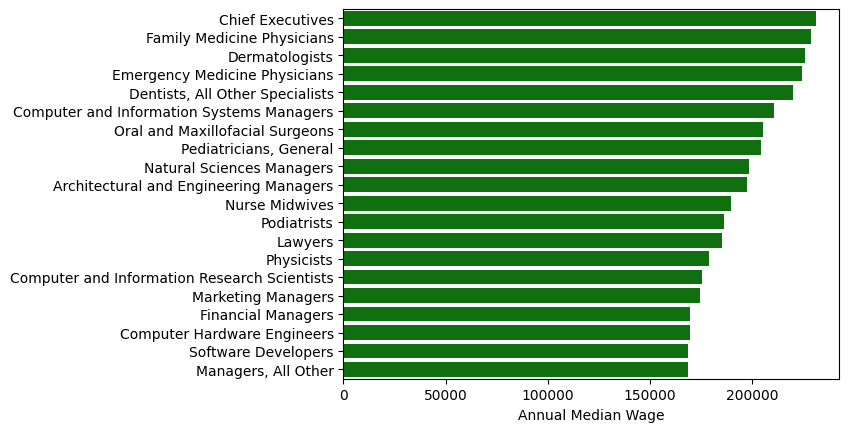

I hope you found the visualization interesting! Do you want to visualize another trend? no
How would you like to proceed?
Please select one of the following:
1. Return to the main menu
2. Quit
1
Taking you back to the beginning...
Welcome to career chatbot.We specialize in guiding job seekers navigating through their career paths.Please choose the options displayed below.
Please select one of the following:
1. Jobs according to education level
2. Job skills required for different occupations
3. Salaries for different fields
4. Visualizations for job market trends
2
What occupation are you interested in learning skills for?nurse
The top skills for a nurse are:
- Adaptability: 4.6
- Adaptability: 4.5
- Detail oriented: 4.5
Please select one of the following:
1. Enter a new occupation
2. Return to the main menu
3. Quit
1
What occupation are you interested in learning skills for?data
The top skills for a data are:
- Mathematics: 4.6
- Computers and information technology: 4.3
- Computers a

In [ ]:
# Start chatbot
# Call main_menu() function to start chatbot!
main_menu()